# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнила студентка гр. 3385 Тараканова Александра Денисовна. Вариант №2.

## Цель работы

 Овладеть навыками работы с математическими пакетами для моделиро
вания, визуализации и анализа социальных сетей.

## Основные теоретические положения

#### Социоматрица
Социоматрица $A$ - это квадратная матрица размера $g \times g$, где $g$ - количество акторов в сети. Элемент $a_{ij}$ принимает значение:
- $1$, если существует связь от актора $i$ к актору $j$
- $0$, если связь отсутствует

Для неориентированных сетей матрица симметрична: $a_{ij} = a_{ji}$

#### Список рёбер
Альтернативное представление сети в виде множества упорядоченных пар:
$E = \{(i,j) | a_{ij} = 1\}$

#### Плотность сети
Плотность $den$ неориентированной сети G вычисляется как:

$$den(G) = \frac{2L}{n(n-1)}$$

где $L$ - количество рёбер, $n$ - количество вершин.

#### Компоненты связности
Компонента связности - максимальное подмножество вершин, где существует путь между любой парой вершин.

#### Диаметр сети
Диаметр $diam$ - максимальное геодезическое расстояние между любой парой вершин в сети G:

$$diam(G) = \max_{i,j} d_{ij}$$

где $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Коэффициент кластеризации
Локальный коэффициент кластеризации $Cl_i$ для вершины $i$ графа G:

$$Cl_i(G) = \frac{2N_i}{k_i(k_i-1)}$$

где $N_i$ - количество треугольников через вершину $i$, $k_i$ - степень вершины.

Глобальный коэффициент кластеризации:

$$Cl(G) = \frac{1}{n} \sum_{i=1}^n C_i$$

### Меры центральности

#### Центральность по степени
Для вершины $i$ в неориентированной сети:

$$C_D(i) = deg(i)$$

Нормированная центральность по степени:

$$C_D'(i) = \frac{deg(i)}{g - 1}$$

#### Центральность по близости
$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ - расстояние между вершинами.

Нормированная центральность по близости:

$$C_C'(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

#### Центральность по посредничеству
$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$, $\sigma_{jk}(i)$ - количество таких путей через $i$.

Нормированная центральность по посредничеству:

$$C_B'(i) =\frac{2 C_B(i)}{(g-1)(g-2)}$$

#### Центральность по информации

Алгоритм нахождения:
1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \times g$
2) Вычислить обратную матрицу $A^{-1} = C$
3) $T = Tr(C)$, $R = ∑c_{ij}$
Тогда центральность по информации:

$$C_I(i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:

$$C_I'(i) = \frac{C_I(i)}{∑C_I(j)}$$



### Меры престижа для ориентированных сетей

#### Престиж по степени
$$P_D(i) = \frac{deg_i(i)}{g-1}$$

где $deg_i(i)$ - полустепень захода.

#### Престиж по близости
$$
P_P(i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum d_{ij}}
$$
где $|I_i|$ — количество вершин, достижимых из $i$,  

#### Престиж по рангу
Решается система уравнений:
$$
\left(\frac{1}{a}E - X\right)^TP_R = x
$$
где:  
- $X$ — социоматрица
- $a = \frac{1}{\lambda}$, где $\lambda$ — максимальное собственное значение матрицы $X$  
- $x$ — вектор сумм столбцов  
- $E$ — единичная матрица  

Нормированный престиж:
$$
P_R^{'}(n_i) = \frac{P_R(n_i)}{m}$$

где $ m = \sum^{g-1}_{k=1} a^kA^k_{g-1}$

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек про
вести анализ заданных социальных сетей вычислить описательные ха
рактеристики. Полученные результаты содержательно проинтерпрети
ровать.

## Выполнение работы

установка необходимой библиотеки.

In [ ]:
install.packages("igraph", repos = "https://cloud.r-project.org/")
library(igraph)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Извлечение социоматрицы и вывод ее на экран.

In [ ]:

# Считывание данных
dan <- read.csv("https://drive.google.com/uc?export=download&id=1bzrkkZTQUObWz7nNwHVwvleWXZ-sfo94", skip = 1)

# Создание социоматрицы преобразованием данных в векторы, которые воспринимаются как числа, определяется количество столбцов и строк
sociomatrix <- matrix(as.numeric(unlist(dan[])),
                     nrow = nrow(dan),
                     ncol = ncol(dan))
print(sociomatrix)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    1     0     0     0     0
 [2,]    0    0    0    0    0    1    1    0    1     0     0     0     0
 [3,]    0    0    0    0    1    0    0    0    1     0     0     0     0
 [4,]    0    0    0    0    0    0    1    0    0     0     1     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     1     0     0
 [6,]    0    1    0    0    0    0    0    0    0     0     0     0     0
 [7,]    0    1    0    1    0    0    0    1    0     0     0     0     0
 [8,]    0    0    0    0    0    0    1    0    0     0     0     0     0
 [9,]    1    1    1    0    0    0    0    0    0     0     0     0     1
[10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[11,]    0    0    0    1    1    0    0    0    0     0     0     0     0
[12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[13,]    0    0    0    0

преобразовать в список ребер и вывести первые 5

In [ ]:
g <- graph_from_adjacency_matrix(sociomatrix, mode = "undirected")#преобразование матрицы в ненаправленный граф
edge_list <- as_data_frame(g, what = "edges")#выбор из графа список ребер
print("Первые 5 элементов списка рёбер:")
print(head(edge_list, 5))#выбирает только первые 5 строк из данных

[1] "Первые 5 элементов списка рёбер:"
  from to
1    1  9
2    2  6
3    2  7
4    2  9
5    3  5


Присвоить имена столбцам и строкам социоматрицы (имена—пер
вая строка в csv-файле после комментариев)

In [ ]:
column_names <- c("Acciaiuoli", "Albizzi", "Barbadori", "Bischeri", "Castellani", "Ginori", "Guadagni", "Lamberteschi", "Medici", "Pazzi", "Peruzzi", "Pucci", "Ridolfi", "Salviati", "Strozzi", "Tornabuoni")
rownames(sociomatrix) <- column_names
colnames(sociomatrix) <- column_names
print(sociomatrix)

             Acciaiuoli Albizzi Barbadori Bischeri Castellani Ginori Guadagni
Acciaiuoli            0       0         0        0          0      0        0
Albizzi               0       0         0        0          0      1        1
Barbadori             0       0         0        0          1      0        0
Bischeri              0       0         0        0          0      0        1
Castellani            0       0         1        0          0      0        0
Ginori                0       1         0        0          0      0        0
Guadagni              0       1         0        1          0      0        0
Lamberteschi          0       0         0        0          0      0        1
Medici                1       1         1        0          0      0        0
Pazzi                 0       0         0        0          0      0        0
Peruzzi               0       0         0        1          1      0        0
Pucci                 0       0         0        0          0   

С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, переда
ваемые в функцию.

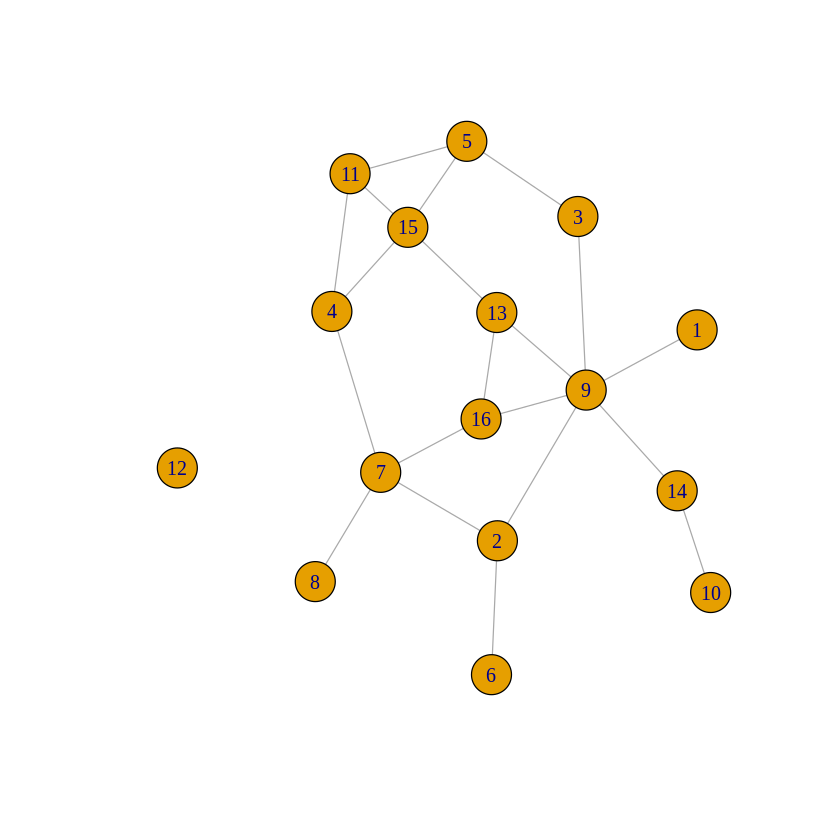

In [ ]:

# Визуализация сети c указанием меток(параметр TRUE)
plot(g, displaylabels = TRUE)

Отобразить сеть с помощью алгоритмов укладки Фрюхтермана—
 Рейнгольда и Камада—Каваи. Объяснить, в чём различие между
 алгоритмами и укладками.

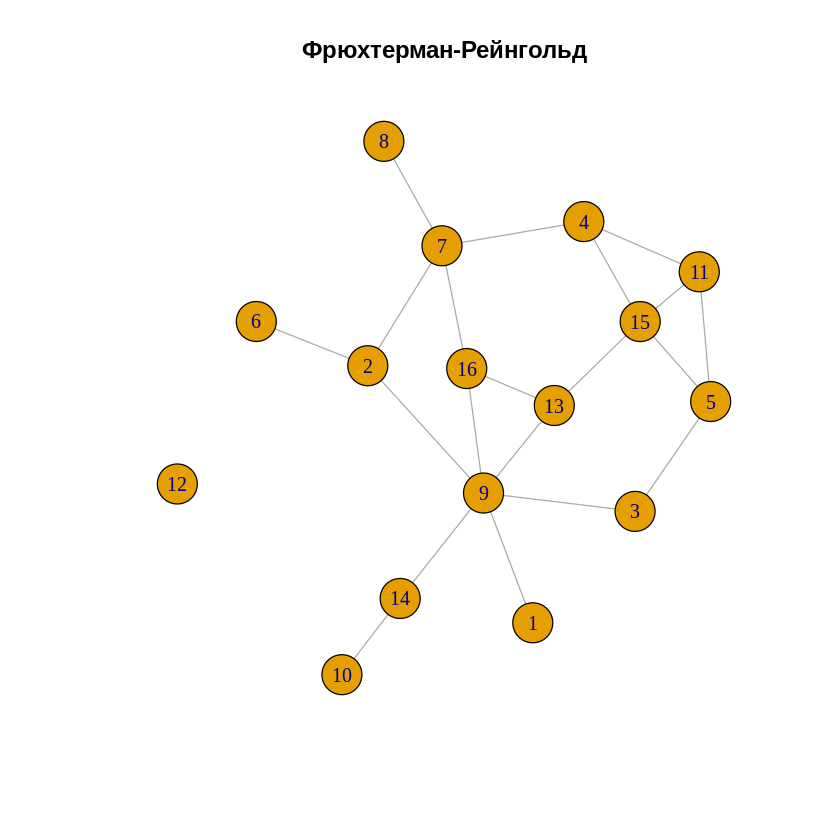

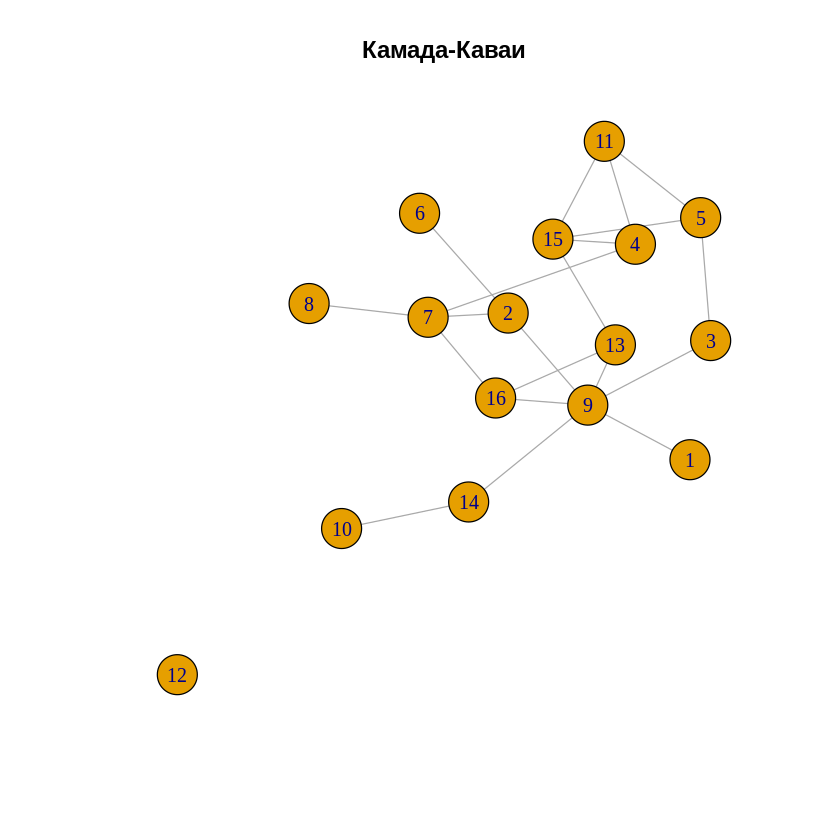

In [ ]:
# Алгоритм Фрюхтермана-Рейнгольда (main-заголовок, layout-укладка)
plot(g, main = "Фрюхтерман-Рейнгольд", layout = layout_with_fr)

# Алгоритм Камада-Каваи
plot(g, main = "Камада-Каваи", layout = layout_with_kk)

### Алгоритмы составлены на основе разных идеалогий.
Первый алгоритм основан на расчете сил притяжения(между связанными частицами) и отталкивания(между всеми частицами), на основе которых для каждой вершины графа вычисляется итоговый вектор перемещения. На каждом шаге происходит ,,охлаждение,, системы.

Второй алгоритм стремится расположить вершины так, чтобы фактическое расстояние между ними было как можно ближе к желаемому. Для этой цели используется расчет кратчайших путей между вершинами графа, на основе которых вычисляется энергия системы, узел который делает наибольший вклад в систему перемещается.

Вывести «описательную сводку» сети.

In [ ]:
install.packages("intergraph")
  library(intergraph)

install.packages("statnet")
  library(statnet)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Перевод графа igraph в граф statnet
sg <- asNetwork(g)
summary(sg)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 20 
   missing edges = 0 
   non-missing edges = 20 
 density = 0.1666667 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    1    9
 [2,]    2    6
 [3,]    2    7
 [4,]    2    9
 [5,]    3    5
 [6,]    3    9
 [7,]    4    7
 [8,]    4   11
 [9,]    4   15
[10,]    5   11
[11,]    5   15
[12,]    7    8
[13,]    7   16
[14,]    9   13
[15,]    9   14
[16,]    9   16
[17,]   10   14
[18,]   11   15
[19,]   13   15
[20,]   13   16

16 вершин, не направленный граф, нет петель, не мультиграф, не гиперграф, не двудольный, 20 ребер, нет ребер, помеченных как отсутствующие, плотность графа =0.17, 16 допустимых имен вершин, нет имен ребер, вывод ребер

 Вычислить «пятичисловую сводку» сети

In [ ]:
# Вычислить размер сети
cat("Количество вершин:", network.size(sg), "\n")

# Вычислить плотность сети
# Вручную: так как граф не направленный достаточно поделитьь количество ребер на количество пар из вершин
N <- network.size(sg)
cat("Плотность вручную:", round((2 * network.edgecount(sg)) / (N * (N - 1)), 3), "\n")
cat("Плотность, подсчитанная функцией:", round(gden(sg), 3), "\n")

# Число компонент сети
cat("Число компонент связности исходя из раскладки:", 2, "\n")
cat("Число компонент связности, подсчитанное функцией:", components(sg), "\n")

# Диаметр сети в statnet
max_component <- component.largest(sg, result = "graph")#находит наибольшую компоненту связности и возвращает в виде графа
min_ways <- geodist(max_component)#матрица кратчайших путей для наибольшей компоненты связности
cat("Диаметр сети:", max(min_ways$gdist), "\n")

# Коэффициент кластеризации
cat("Коэффициент кластеризации:", round(gtrans(sg, mode = "graph"), 3), "\n")#рассчет глобального коэффициента кластеризации для ненаправленного графа

Количество вершин: 16 
Плотность вручную: 0.167 
Плотность, подсчитанная функцией: 0.167 
Число компонент связности исходя из раскладки: 2 
Число компонент связности, подсчитанное функцией: 2 
Диаметр сети: 5 
Коэффициент кластеризации: 0.191 


Вывод:граф разряженный, так как его плотность значительно меньше единицы, состоит из двух компонент связности, диаметр сети достаточно большой, что хорошо соотносится с маленькой плотностью графа, коэффициент кластеризации так же не велик из-за малогот количества ребер.

вычислить меры центральности для неизолированных вершин

In [ ]:


isolated <- which(degree(sg, gmode = "graph") == 0) #выбор всех изолированные вершины
non_isolated <- sg #создание копии графа, чтобы не "портить" основной
delete.vertices(non_isolated, isolated) #удаление ненужных вершин
n <- network.size(non_isolated) #определение размера итогового графа
deg <- degree(non_isolated,gmode = "graph") #вектор, содержащий степень для каждой вершины

closeness_cent <- closeness(non_isolated)#вектор состоящий из уже отнормированной центральности по близости
between_cent <- betweenness(non_isolated)#вектор состоящий из центральности по посреднечеству, но учитывает пути в обе стороны, стоило разделить на 2, но из-за дольнейшей нормировки этого не делается
info_cent <- infocent(non_isolated)



centrality_table <- data.frame(
  Vertex = network.vertex.names(non_isolated),
  Norm_Degree = deg / (n - 1),
  Norm_Closeness = closeness_cent,
  Norm_Betweenness = between_cent/((n-1)*(n-2)),
  Norm_Information = info_cent/sum(info_cent)

)

# Вывод таблицы
cat("Таблица мер центральности:\n")
print(centrality_table, row.names = FALSE)

Таблица мер центральности:
 Vertex Norm_Degree Norm_Closeness Norm_Betweenness Norm_Information
      1  0.07142857      0.3684211       0.00000000       0.04943215
      2  0.21428571      0.4827586       0.21245421       0.07408484
      3  0.14285714      0.4375000       0.09340659       0.06816655
      4  0.21428571      0.4000000       0.10439560       0.07427531
      5  0.21428571      0.3888889       0.05494505       0.07093098
      6  0.07142857      0.3333333       0.00000000       0.04309479
      7  0.28571429      0.4666667       0.25457875       0.08190476
      8  0.07142857      0.3255814       0.00000000       0.04562892
      9  0.42857143      0.5600000       0.52197802       0.09502877
     10  0.07142857      0.2857143       0.00000000       0.03515798
     11  0.21428571      0.3684211       0.02197802       0.06953773
     13  0.21428571      0.5000000       0.11355311       0.08040678
     14  0.14285714      0.3888889       0.14285714       0.05337198
     15

значение центральностей отличается друг от друга так как они имеют различный смысл.

повтор пунктов для направленного графа

извлечение социоматрицы

In [ ]:
# Создание матрицы из данных
data <- c(0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
          0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
          0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
          1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
          1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
          0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
          1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
          0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
          0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0)

# Создание матрицы 21x21 (поскольку у вас 21 строка и 21 столбец)
sociomatrix2 <- matrix(data, nrow = 21, ncol = 21, byrow = TRUE)

print(sociomatrix2)

Warning message in matrix(data, nrow = 21, ncol = 21, byrow = TRUE):
“data length [439] is not a sub-multiple or multiple of the number of rows [21]”


      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    1    0    1    0    0    0    1    0     0     0     1     0
 [2,]    1    0    0    0    0    0    0    0    0     0     0     0     0
 [3,]    0    0    0    0    0    0    0    0    0     0     0     0     1
 [4,]    1    0    0    0    0    0    1    0    0     0     1     0     0
 [5,]    1    0    0    0    0    0    0    1    0     1     0     0     1
 [6,]    1    0    0    0    0    1    0    1    0     0     1     0     0
 [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [8,]    0    0    1    0    0    0    0    0    0     0     0     0     0
 [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[10,]    0    1    0    1    0    0    1    1    0     0     1     0     0
[11,]    1    1    1    1    0    0    1    1    0     0     1     1     0
[12,]    0    0    1    0    0    0    0    0    0     0     0     0     0
[13,]    0    0    0    1

преобразовать в список ребер и вывести первые 5

In [ ]:
library(igraph)
g2 <- graph_from_adjacency_matrix(sociomatrix2)#преобразование матрицы в ненаправленный граф
edge_list <- as_data_frame(g2, what = "edges")#выбор из графа список ребер
print("Первые 5 элементов списка рёбер:")
print(head(edge_list, 5))#выбирает только первые 5 строк из данных

[1] "Первые 5 элементов списка рёбер:"
  from to
1    1  2
2    1  4
3    1  8
4    1 12
5    1 16


Присвоить имена столбцам и строкам социоматрицы

In [ ]:
column_names2 <- c("1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20","21")
rownames(sociomatrix2) <- column_names2
colnames(sociomatrix2) <- column_names2
print(sociomatrix2)

   1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
1  0 1 0 1 0 0 0 1 0  0  0  1  0  0  0  1  0  0  0  0  0
2  1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  1  0  0  1  0
3  0 0 0 0 0 0 0 0 0  0  0  0  1  0  0  0  0  1  0  0  1
4  1 0 0 0 0 0 1 0 0  0  1  0  0  0  1  1  0  0  0  0  0
5  1 0 0 0 0 0 0 1 0  1  0  0  1  0  0  1  0  1  0  1  0
6  1 0 0 0 0 1 0 1 0  0  1  0  0  0  0  1  0  0  0  1  0
7  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0
8  0 0 1 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0
9  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0
10 0 1 0 1 0 0 1 1 0  0  1  0  0  0  1  0  0  0  1  0  1
11 1 1 1 1 0 0 1 1 0  0  1  1  0  1  0  1  1  1  0  0  1
12 0 0 1 0 0 0 0 0 0  0  0  0  0  0  0  1  0  0  0  1  0
13 0 0 0 1 0 0 0 0 0  1  0  0  0  0  0  0  0  0  0  0  0
14 0 0 0 0 0 1 0 0 0  0  0  0  0  1  0  0  0  0  0  0  1
15 0 1 0 1 1 0 0 1 0  1  0  0  1  0  0  0  0  1  0  0  1
16 1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  1
17 1 1 1 1 1 1 1 1 1  1  1  0  

С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть. Объяснить параметры, переда ваемые в функцию.

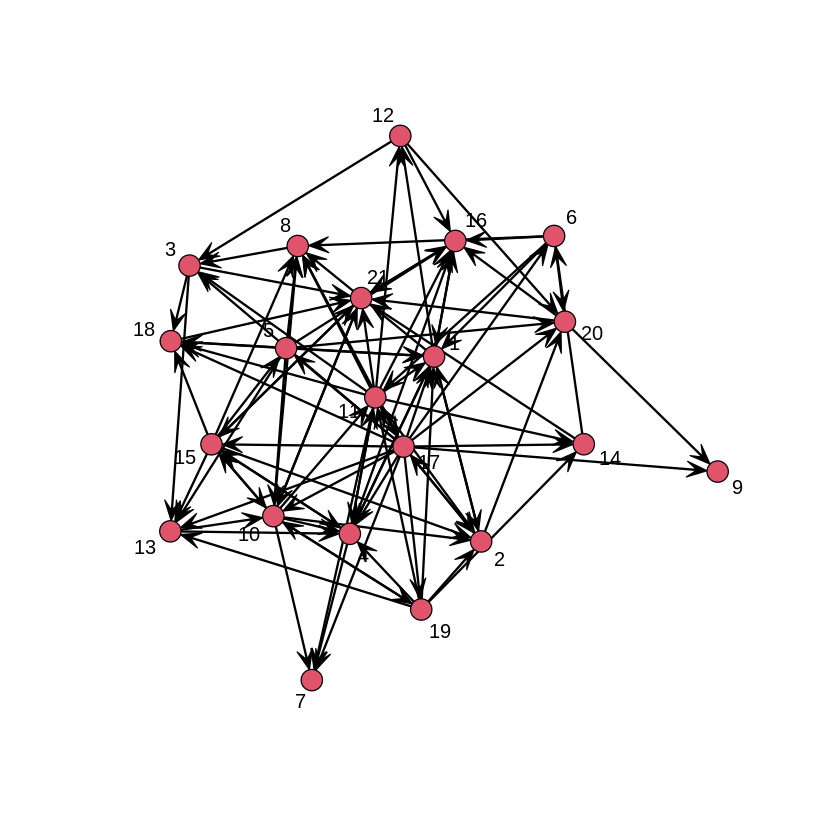

In [ ]:
gplot(sociomatrix2, vertex.col = 2, displaylabels = TRUE)

Отобразить сеть с помощью алгоритмов укладки Фрюхтермана— Рейнгольда и Камада—Каваи.

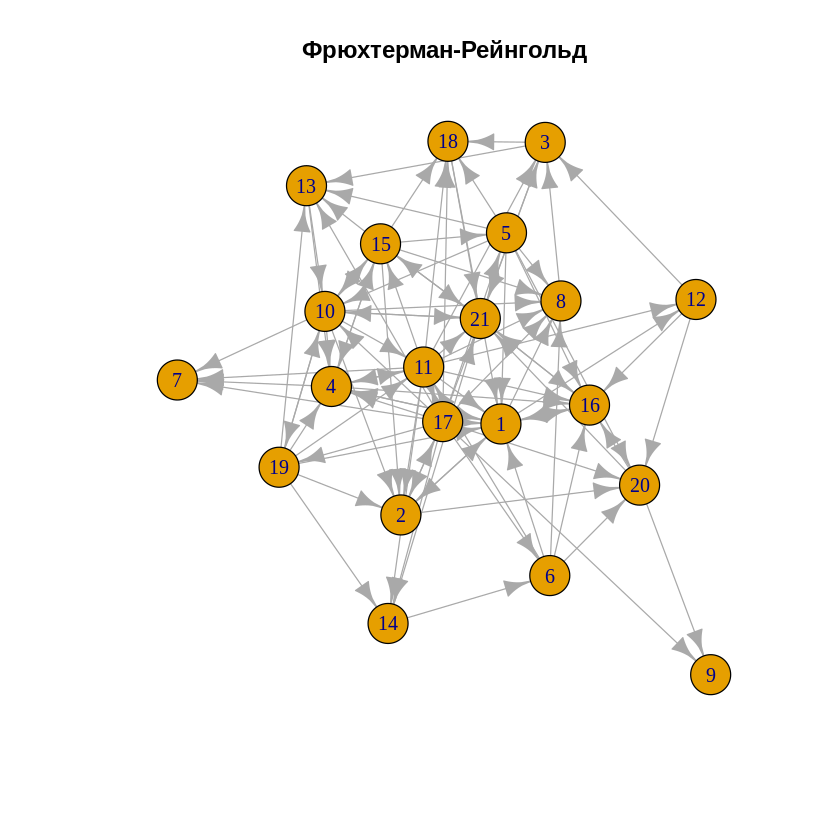

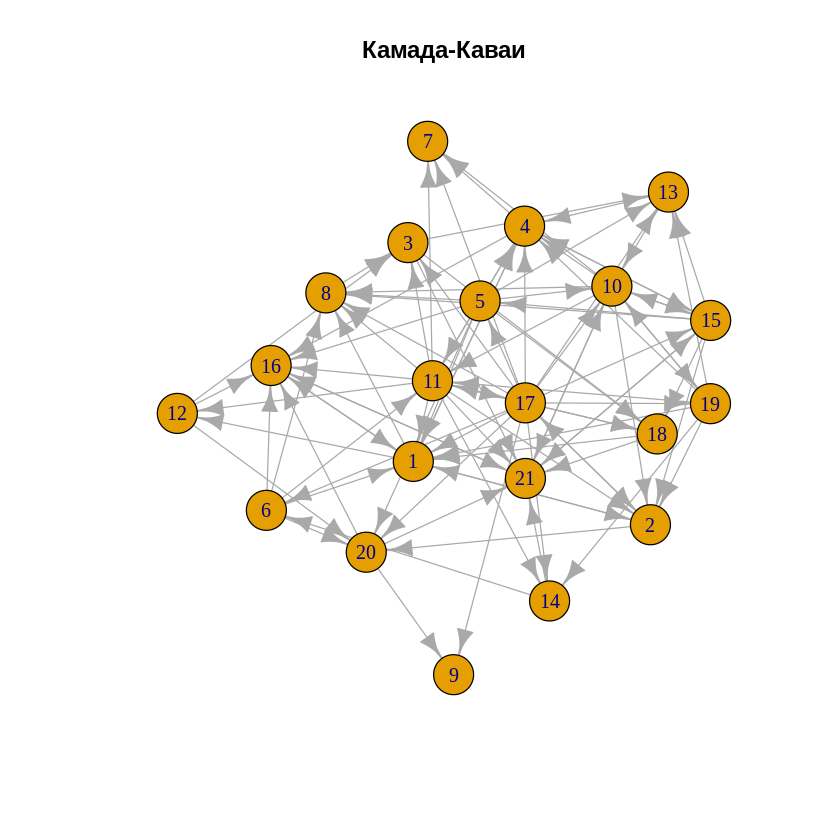

In [ ]:
# Алгоритм Фрюхтермана-Рейнгольда (main-заголовок, layout-укладка)
plot(g2, main = "Фрюхтерман-Рейнгольд", layout = layout_with_fr)

# Алгоритм Камада-Каваи
plot(g2, main = "Камада-Каваи", layout = layout_with_kk)

Вывести «описательную сводку» сети.

In [ ]:
# Перевод графа igraph в граф statnet
sg2 <- asNetwork(g2)
summary(sg2)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = TRUE
  multiple = FALSE
  bipartite = FALSE
 total edges = 103 
   missing edges = 0 
   non-missing edges = 103 
 density = 0.2335601 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    1    2
  [2,]    1    4
  [3,]    1    8
  [4,]    1   12
  [5,]    1   16
  [6,]    2    1
  [7,]    2   17
  [8,]    2   20
  [9,]    3   13
 [10,]    3   18
 [11,]    3   21
 [12,]    4    1
 [13,]    4    7
 [14,]    4   11
 [15,]    4   15
 [16,]    4   16
 [17,]    5    1
 [18,]    5    8
 [19,]    5   10
 [20,]    5   13
 [21,]    5   16
 [22,]    5   18
 [23,]    5   20
 [24,]    6    1
 [25,]    6    6
 [26,]    6    8
 [27,]    6   11
 [28,]    6   16
 [29,]    6   20
 [30,]    8    3
 [31,]   10    2
 [32,]   10    4
 [33,]   10    7
 [34,]   10    8
 [35,]   10   11
 [36,]   10   15
 [37,]   10   19
 

Вычислить «пятичисловую сводку» сети

In [ ]:
# Вычислить размер сети
cat("Количество вершин:", network.size(sg2), "\n")

# Вычислить плотность сети
# Вручную: так как граф не направленный достаточно поделитьь количество ребер на количество пар из вершин
N2 <- network.size(sg2)
cat("Плотность вручную:", round((network.edgecount(sg2)) / (N2 * (N2 - 1)), 4), "\n")
cat("Плотность, подсчитанная функцией:", round(gden(sg2), 4), "\n")

# Число компонент сети
cat("Число компонент связности исходя из раскладки:", 1, "\n")
cat("Число компонент связности, подсчитанное функцией:", components(sg2, connected =  "weak"), "\n")#для напрвленного графа учитываются компоненты слабой связности

# Диаметр сети в statnet
max_component <- component.largest(sg2, result = "graph")#находит наибольшую компоненту связности и возвращает в виде графа
min_ways <- geodist(max_component)#матрица кратчайших путей для наибольшей компоненты связности
cat("Диаметр сети:", max(min_ways$gdist), "\n")

# Коэффициент кластеризации
cat("Коэффициент кластеризации:", round(gtrans(sg2, mode = "disgraph"), 3), "\n")#рассчет глобального коэффициента кластеризации для ненаправленного графа

Количество вершин: 21 
Плотность вручную: 0.2452 
Плотность, подсчитанная функцией: 0.2333 
Число компонент связности исходя из раскладки: 1 
Число компонент связности, подсчитанное функцией: 1 
Диаметр сети: 6 
Коэффициент кластеризации: 0.401 


вычислить меры престижа

In [ ]:
deg2 <- degree(sg2, cmode = "indegree") #степень по входящим вершинам
n2 <- network.size(sg2)

closen <- igraph::closeness(g2, mode = "in", normalized = FALSE)#вычисление центральности по близости, но для входящих ребер без нормирования
I_i <- colSums(is.finite(igraph::distances(g2, mode = "in")))# Подсчет достижимых вершин для каждого узла(матрица минимальных расстояний с входящими ребрами преобразуется в лгическую(чтобы не учитывать бесконечности ), а затем суммируется по столбцам)
proximity <- I_i^2/((n2-1)*closen) #престиж по близости


l1 <- ceiling(max(Re(eigen(sociomatrix2)$values)))#нахождение максимально вещественного собственного числа матрицы
a <- 1/l1 #параметр затухания
x <- colSums(sociomatrix2) #вектор-столбец суммы социоматрицы
I <- diag(length(x))
Xt <- t(sociomatrix2) #транспонированная матрица
Range <- solve((1/a)*I-Xt,x)

# Функция для вычисления числа размещений A(n,k) = n!/(n-k)!
arrangements <- function(n, k) {
  if (k > n) return(0)
  return(factorial(n) / factorial(n - k))
}

# Вычисление суммы m = ∑_{k=1}^{g-1} a^k * A(g-1, k)
calculate_m <- function(a, g) {
  total <- 0
  for (k in 1:(g-1)) {
    total <- total + (a^k) * arrangements(g-1, k)
  }
  return(total)
}
Norm <- calculate_m(a,n2)

prestige_table <- data.frame(
  Vertex = column_names2,
  Norm_Degree = deg2 / (n2 - 1),
  Norm_proximity = proximity/sum(proximity),
  Norm_Range = Range/Norm

)

# Вывод таблицы
cat("Таблица мер престижа:\n")
print(prestige_table, row.names = FALSE)


Таблица мер престижа:
 Vertex Norm_Degree Norm_proximity   Norm_Range
      1        0.45   0.0376229418 6.474624e-06
      2        0.30   0.0483723538 4.799336e-06
      3        0.20   0.0524033833 2.826044e-06
      4        0.35   0.0443413243 5.377907e-06
      5        0.10   0.0631527952 1.300103e-06
      6        0.10   0.0819642661 1.204835e-06
      7        0.20   0.0001310161 3.308046e-06
      8        0.35   0.0429976478 5.008217e-06
      9        0.10   0.0001736725 9.863675e-07
     10        0.30   0.0456850008 4.240811e-06
     11        0.25   0.0524033833 3.999591e-06
     12        0.10   0.0564344127 2.200492e-06
     13        0.25   0.0497160303 2.628736e-06
     14        0.15   0.0698711777 2.161541e-06
     15        0.20   0.0470286773 4.106840e-06
     16        0.40   0.0389666183 6.640449e-06
     17        0.10   0.0658401482 1.865434e-06
     18        0.25   0.0483723538 3.083724e-06
     19        0.10   0.0618091187 1.724652e-06
     20        0.2

## Выводы

Освоен инструментарий пакетов igraph и statnet для анализа социальных сетей. Получены навыки работы с сетевыми данными: преобразование между различными форматами, визуализация с использованием алгоритмов укладки, расчет базовых сетевых показателей и мер центральности/престижа.